# Assignment #3 - Neural Networks

### <font color="red"> DUE: Nov 13 (Friday) 11:00 pm </font>  

<font color="blue"> Sapna Pareek </font>

# I. Overview

##### Objective

The objective of this assignment is to grasp the knowledge in Neural Networks and understand by implementing various neural network algorithms. Neural Networks are the set of algorithms that are designed to work as neurons in human brain, basic purpose of the neural network is to recognize patterns. Once the neural network is trained on the data using training data it can predict values on the future data by detecting the similar patterns. In this assignment we will learn about various neural network models and their methods like 5-fold cross validation, Nonlinear Regression and Nonlinear Logistic Regression.

##### Approach

To accomplish this assignment, we to understand the purpose and how neural networks work their implementation. By implementing the 5-fold cross validation to find good neural network parameters and report the CV accuracy. For implementing the Nonlinear Regression, we will summarize the nonlinear regression model, use the NeuralNet class for regression to apply to out toy data which will be helpful in analysing the results. Next, we will implement nonlinear logistic regression and analyse the results on toy data. From all these implementations we will analyse about the learning of nonlinear regression model.

# II. Data

### II.1. Description

Data set for Regression used is related to the bike sharing rental process. Nowadays over 500 application are there for bike sharing. Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Using this data set we can infer that how the environmental and seasonal settings affect the bike sharing count. Below is the information about the dataset: -
          
**Dataset name**: hour.csv

**Number of features**: 17

**Number of Instances**: 17379
         
**Information about features**: -
1. instant: record index
2. dteday : date
3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. hr : hour (0 to 23)
7. holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
8. weekday : day of the week
9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
12. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
13. hum: Normalized humidity. The values are divided to 100 (max)
14. windspeed: Normalized wind speed. The values are divided to 67 (max)
15. casual: count of casual users
16. registered: count of registered users
17. cnt: count of total rental bikes including both casual and registered

# Source

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

Original Source: http://capitalbikeshare.com/system-data
Weather Information: http://www.freemeteo.com
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### II.1.a. Reading the Data

Bike sharing data set is present in the "hour.csv" file. we will read the data using the pandas function read_csv to read the data.

In [2]:
df_Reg = pd.read_csv("hour.csv")
df_Reg

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Pre-processing of the Data

Using data pre-processing we transform raw data in useful and efficient format. We will check if any null values are there and do the statistical analysis of the data using the describe and info functions.

In [3]:
df_Reg.any().isnull()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [4]:
df_Reg.drop(columns= ['windspeed'],axis=1, inplace=True)
df_Reg.drop(columns= ['yr'],axis=1, inplace=True)
df_Reg.drop(columns= ['dteday'],axis=1, inplace=True)
df_Reg.drop(columns= ['casual'],axis=1, inplace=True)
df_Reg.drop(columns= ['registered'],axis=1, inplace=True)
condition = df_Reg.cnt < 5 #if cnt is less than 5
column_name = 'cnt'
df_Reg.loc[condition, column_name] = 0
df_Reg

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,cnt
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,16
1,2,1,1,1,0,6,0,1,0.22,0.2727,0.80,40
2,3,1,1,2,0,6,0,1,0.22,0.2727,0.80,32
3,4,1,1,3,0,6,0,1,0.24,0.2879,0.75,13
4,5,1,1,4,0,6,0,1,0.24,0.2879,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,12,19,0,1,1,2,0.26,0.2576,0.60,119
17375,17376,1,12,20,0,1,1,2,0.26,0.2576,0.60,89
17376,17377,1,12,21,0,1,1,1,0.26,0.2576,0.60,90
17377,17378,1,12,22,0,1,1,1,0.26,0.2727,0.56,61


In [5]:
df_Reg.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,189.338224
std,5017.0295,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,181.516877
min,1.0000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,4345.5000,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,40.000000
50%,8690.0000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,142.000000
75%,13034.5000,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,281.000000
max,17379.0000,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,977.000000


In [6]:
df_Reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


### II.2. Visualization of the Data

Data visualization is a method to extract the information about the data using the graphical representation of data. Here for visualizing the Regression data set we will use matplotlib and seaborn libraries. Using the mentioned libraries, we will plot below mentioned graphs: -

**Pair plot**: Plots pairwise relationship of the data. A grid of axis is created such that each feature on the y axis is shared as a single row on the x axis across a single column. The diagonal axis shows the univariate distribution for variable in that column.

**Box plot**: Box is representation of data in form of diagram where data values are represented as Box and we can infer the maximum, minimum and values that lies between some values.

**Histogram**: Graphical representation of distribution of the numerical data.

C:\Users\paree\Anaconda3\envs\py38\lib\site-packages\seaborn\matrix.py:301: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, vmin=self.vmin, vmax=self.vmax,


<AxesSubplot:>

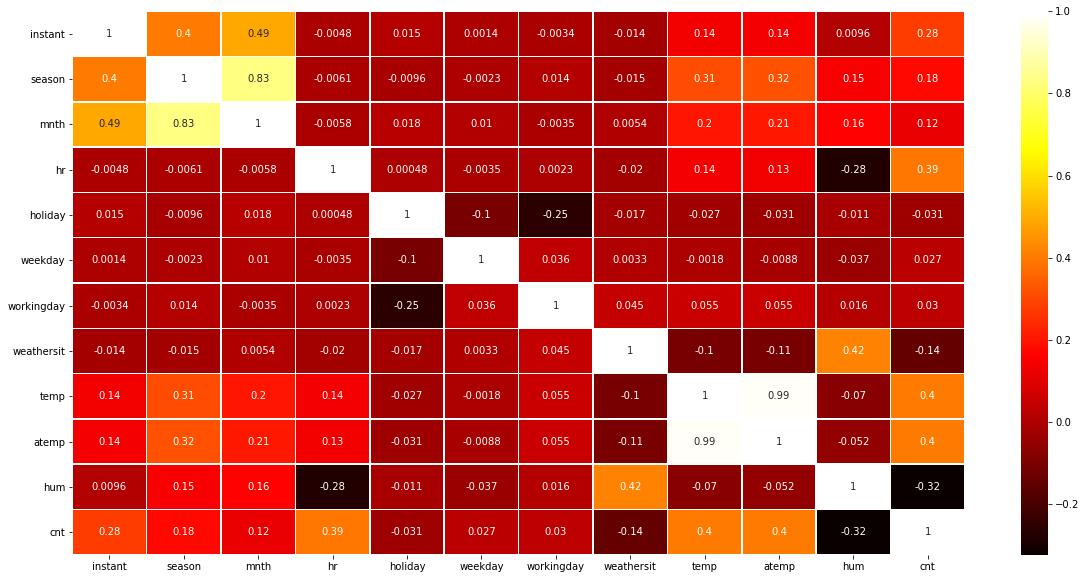

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df_Reg.corr(),annot=True, lineWidth = 0.5, cmap='hot')

<AxesSubplot:>

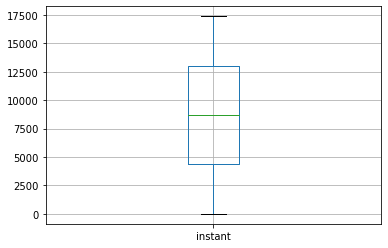

In [8]:
df_Reg.boxplot(column='instant')

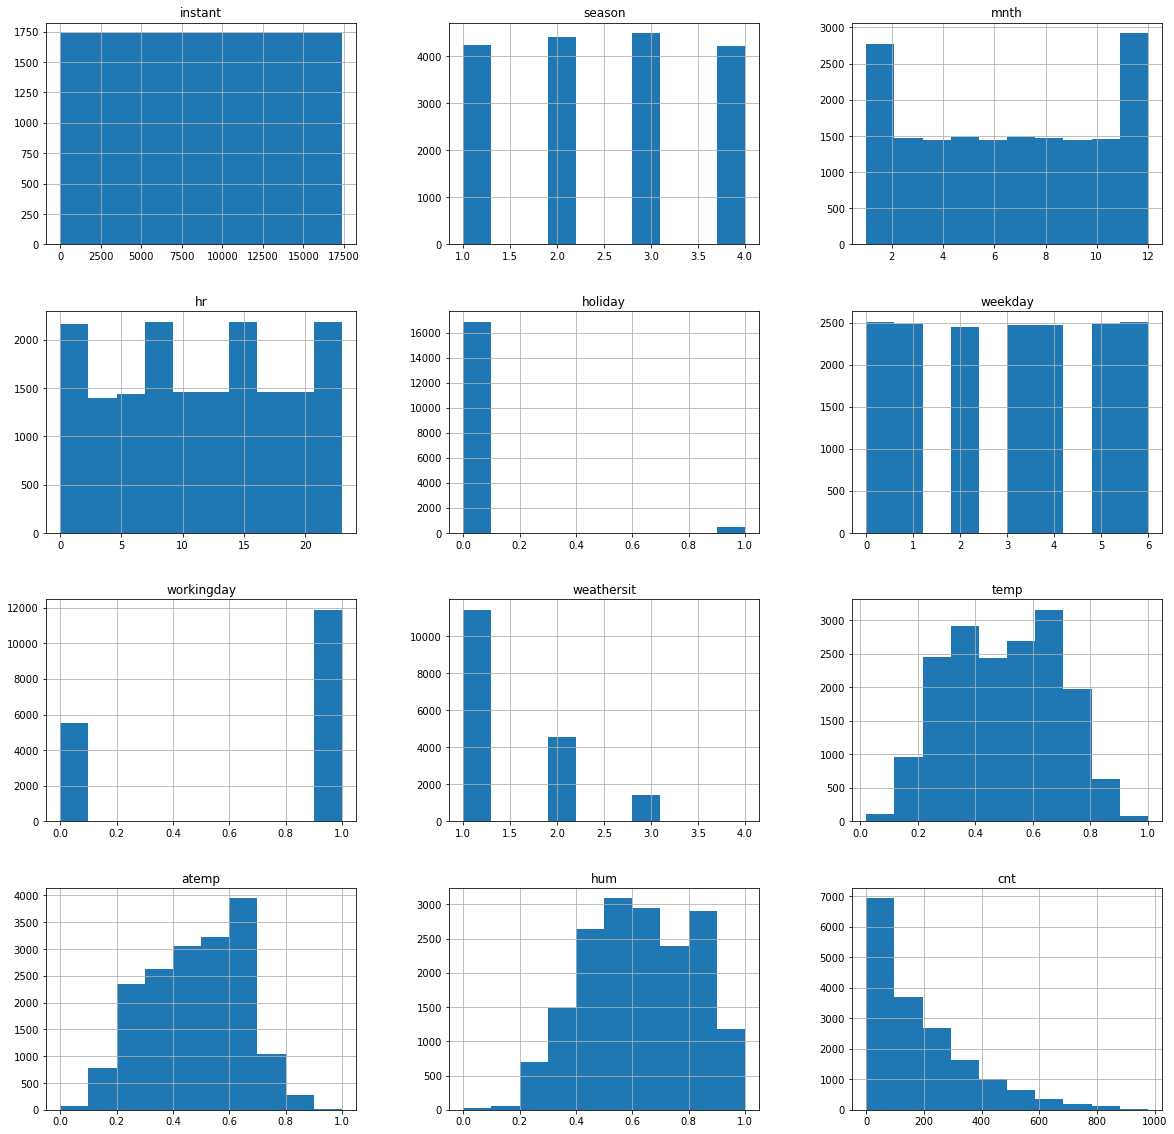

In [9]:
df_Reg.hist(figsize=(20,20))

plt.show()

<AxesSubplot:>

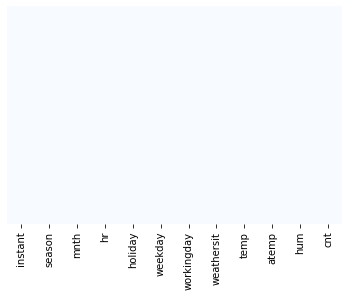

In [10]:
# Findout if we have any null values using graph
sns.heatmap(df_Reg.isnull(), yticklabels = False, cbar = False, cmap="Blues") #we do not have any null values

### II.3. Preliminary Observations (Reading and Analyzing the plots): -

**Heatmap**: From intensity of the colours we can get the information about the correlation of each features. 1 means the maximum corelation. Diagonal value is mapped to itself, so it has the maximum correlation that is 1. From the graph we can observe that maximum corelation is between the cnt and registered which is 0.97. Minimum correlation between cnt and holiday is -0.031.

**Boxplot**: From the boxplot for instance we can observe that instance value lies in range of 0 t0 17500. So minimum value is 0 and maximum value is 17500. Whereas intermediate value lies between 7500 to 10000.

**Histogram**: From this graph we can observe the frequency of occurrence of data. The occurrence of each feature is mapped so we can get the distribution of data precisely.

**Heatmap**: This type of heatmap is used to show if data has any null values. From the graph we can observe that there is no null value in our data.

Dropping the output target column 'cnt'

In [11]:
df_Reg_input = df_Reg.drop(columns=['cnt'])
df_Reg_input.shape

(17379, 11)

# III. Methods

### III.1.a Summary of 5-fold Cross Validation

Cross Validation is a statistical approach or method to estimate the skill of machine learning models. It is commonly used in applied machine learning to compare the performance of the various machine learning models. It is mainly used where goal the goal is prediction and to estimate how efficiently a predictive model will perform in practice. The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like over fitting or selection bias and to give an insight on how the model will generalize to an independent data set.

K-fold cross validation follows the procedure that has a single parameter called k that refers to the number of groups that a given data sample is to be split into. This procedure is called as K-fold cross validation. We choose a specific value for k and say k=5, we can represent as 5-fold cross validation. Its basic use is to estimate how the model is working on the unseen data.

The activation function is used for the nonlinear transformation of the input by to learn and send it to the next layers. There exist various types of activation function such as Relu, Sigmoid, tanh, step function etc, can be used in our neural networks to get the desired output.

Below is the general procedure that 5-fold cross validation follows: -

1. Shuffle the dataset randomly
2. Split the dataset into 5 groups 
3. For each unique group: divide the group into training set and test set, fit the model on training set and evaluate on test set, and retain the evaluation score and discard the model.
4. Summarise the model skill using the sample of model evaluation score.

### III.1.b Correctness of implementation

In [12]:
from sklearn.metrics import mean_squared_error

In [16]:
from nn import NeuralNet
from util import Standardizer
from grad import scg

In [17]:
def split(data, folds=5.0):
    fold_size = int(len(data) / folds)
    mylist = []
    x = 0.0
    
    while x < len(data):
        mylist.append(data[int(x):int(x + fold_size)])
        x += fold_size
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    
    X_partitioned = split(X)
    T_partitioned = split(T)
    
     
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        
        
        
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

#### Explanation of above code: -

- Data is split into 5 folds. Based on the input size we can fold the data into any numbers. Since here we are working 5-folds we will split into 5 folds.
- The cross_validate function takes x which contains the sample, T which contains the target values of the sample.
- The Data is trained with different parameters that are passed and evaluating it on the validation data.
- Function returns the final_list and best_paramlist which divide data into 5 folds
- Model with the best parameter is retained and applied to the test set.

In [18]:
df_Reg_target=pd.DataFrame(df_Reg['cnt'])
df_Reg_target.shape

(17379, 1)

In [19]:
models = [[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]

bestAccuracy,bestParam = cross_validate(np.array(df_Reg_input), np.array(df_Reg_target), models)

Test number:  0
K is :  0
K is :  1


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[202.20000032321235, 154.47800883132695, 140.6695601786705, 129.64489028797348, 253.69208308755992]
129.64489028797348
[11, 9, 1]
K is :  2


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[180.40155169906257, 199.19143589410103, 351.1385008249901, 215.0660940873076, 192.43086067672712]
180.40155169906257
[11, 3, 1]
K is :  3


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[479.81163235403073, 755.7337598805561, 341.13285333128266, 276.7029927788498, 120.574996015845]
120.574996015845
[11, 12, 1]
K is :  4


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[386.98843984865715, 189.63622736763173, 325.2774697082129, 505.937936326824, 455.0530509212398]
189.63622736763173
[11, 5, 1]
[[11, 9, 1], [11, 3, 1], [11, 12, 1], [11, 5, 1]]
[129.64489028797348, 180.40155169906257, 120.574996015845, 189.63622736763173]
[11, 7, 1]


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  1
K is :  0


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[73.02219914473835, 61.848963622132295, 36.27104681055011, 31.27097519232887, 29.09398133308271]
29.09398133308271
[11, 12, 1]
K is :  1
K is :  2


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[181.2034698347226, 205.84030632635378, 345.51091942030166, 449.34539941613826, 152.28190695535315]
152.28190695535315
[11, 12, 1]
K is :  3


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[220.2589752351978, 322.50792270249485, 167.55333802768806, 153.55079584281734, 166.5509007287767]
153.55079584281734
[11, 9, 1]
K is :  4


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[220.83943463898555, 330.0183023181137, 211.81836657551082, 150.002941499702, 281.9371062795831]
150.002941499702
[11, 9, 1]
[[11, 12, 1], [11, 12, 1], [11, 9, 1], [11, 9, 1]]
[29.09398133308271, 152.28190695535315, 153.55079584281734, 150.002941499702]
[11, 3, 1]


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  2
K is :  0


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[58.99762096924411, 37.90320007468372, 34.35928909494692, 31.00163514262566, 27.94373912416547]
27.94373912416547
[11, 12, 1]
K is :  1


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[109.95071693272986, 162.8166404199397, 160.9217945858642, 294.22002597313224, 118.72268318343471]
109.95071693272986
[11, 3, 1]
K is :  2
K is :  3


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[481.1369361813973, 315.6435732330125, 321.05396377327196, 138.6288118286276, 177.48342921643032]
138.6288118286276
[11, 9, 1]
K is :  4


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[376.8703940057505, 283.45927309533954, 194.12721136965814, 225.3100441019463, 163.28407286427148]
163.28407286427148
[11, 12, 1]
[[11, 12, 1], [11, 3, 1], [11, 9, 1], [11, 12, 1]]
[27.94373912416547, 109.95071693272986, 138.6288118286276, 163.28407286427148]
[11, 3, 1]


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  3
K is :  0


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[62.60724189294317, 36.58793575175226, 33.86880370273758, 30.717753222383553, 30.26090384324227]
30.26090384324227
[11, 12, 1]
K is :  1


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[202.0476746894985, 114.94630112687516, 87.50617729462837, 447.45280786433045, 392.6090104407612]
87.50617729462837
[11, 7, 1]
K is :  2


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[325.78770945087155, 185.75504151991774, 435.1694221699142, 213.39627139228415, 174.29755482824925]
174.29755482824925
[11, 12, 1]
K is :  3
K is :  4


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[384.367990328169, 263.1920364518921, 366.8032879774029, 321.99956275581263, 526.2367784890918]
263.1920364518921
[11, 5, 1]
[[11, 12, 1], [11, 7, 1], [11, 12, 1], [11, 5, 1]]
[30.26090384324227, 87.50617729462837, 174.29755482824925, 263.1920364518921]
[11, 3, 1]


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  4
K is :  0


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[58.990263510661734, 53.87194240743124, 41.932471228024475, 31.389114290848948, 29.398915008167997]
29.398915008167997
[11, 12, 1]
K is :  1


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[196.71589156201273, 92.14346508416634, 105.92322821047232, 124.52782264866008, 327.3420034101145]
92.14346508416634
[11, 5, 1]
K is :  2


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[181.8259023155234, 174.88665446537837, 381.98244056677, 263.95053626413676, 182.1547647614859]
174.88665446537837
[11, 5, 1]
K is :  3


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\paree\Desktop\Pr

[[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]]
[239.12543071064013, 167.4326719991342, 199.59130781360116, 169.70890914014174, 198.49993915180957]
167.4326719991342
[11, 5, 1]
K is :  4
[[11, 12, 1], [11, 5, 1], [11, 5, 1], [11, 5, 1]]
[29.398915008167997, 92.14346508416634, 174.88665446537837, 167.4326719991342]
[11, 3, 1]


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [20]:
print(bestAccuracy,bestParam)

[93.84160392653415, 113.47868283615152, 327.44241490863203, 471.3122113033241, 218.04320356663163] [[11, 7, 1], [11, 3, 1], [11, 3, 1], [11, 3, 1], [11, 3, 1]]


In [21]:
from sklearn import model_selection

In [22]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df_Reg_input),np.array(df_Reg_target),test_size=0.30,random_state=40)

## III.2 Summary of Nonlinear Regression

Nonlinear regression is a statistical technique that helps describe the nonlinear relationship in experimental data. Nonlinear regression describes relation between the continuous response and one or more predictor new observations. Nonlinear regression models are assumed to be a parametric, where the model is described as nonlinear equation. It is a form of regression analysis where it forms a graph whereas linear regression forms a straight line. The main objective of the model is to sum of squares as small as possible. The smaller the sum of squares the better it fits the dataset. It is used to check how our observations are varying from the mean of the data set.

In [23]:
from nn import NeuralNet
from util import Standardizer
from grad import scg

### III.3 Explanation of codes

From the above we can observe that we have imported NeuralNet from nn, Standardizer from util and scg from grad. Standardizer class normalizes all the values. The architecture of the Neural network is defined in the NeuralNet class. NeuralNet class builds the neural network that learns the data from the froward and backword propagation.

The nnunits define the number of inputs, hidden units, and output. set_hunit function is used to initiate the weights and later update the weights. The pack function is used to pack the multiple weights of each layer in one vector where unpack does the opposite of pack.

Forward propagation propagates the input in the forward direction and can be expressed as in below equation: -

$$
\begin{align}
Z &amp;= h(Xl \cdot V) \\
\\
Y &amp; = Zl \cdot W 
\end{align}
$$

Backward propagation does the correction in weights based on the output values and the target values and takes the difference delta between them and these are backpropagated so that the weights and biases are updated. Below is the equation:-

$$
\begin{align}
V &amp;\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &amp;\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$

Activation function is used to make the network nonlinear. In backward pass the function takes the z values, Target values and error as input. 

Train function takes the target and feature as input. The gradientf unpacks the weights and proceed with the forward pass. Error is calculated as a result of forward propagation. optimtarget corrects the weights and updates accordingly. The use function is used on the testing set.

In [24]:
model=NeuralNet([11,3,1])  
model.train(X_train,y_train,niter=1000)

C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


{'w': array([ 7.37899763e-01, -6.48093102e+00, -1.60104364e+00,  1.71780383e-01,
        -1.76039058e-01,  3.80240643e-02,  1.00972696e-01, -1.50176707e-01,
        -4.85019113e-02, -1.28795128e-01,  1.56357913e-01,  6.70186324e-02,
        -1.15425840e+00, -9.32599280e+00,  3.69842626e+00,  2.72347858e-02,
        -6.96886775e-02, -1.84822849e-01,  1.71194045e-02, -3.03736742e-02,
        -7.01112010e-03,  1.85966928e-01, -8.66317500e-01, -7.94410461e-01,
        -6.41470885e-02,  9.08371595e-02,  1.09221527e-02,  6.03995476e-02,
        -7.09462476e-03, -6.96535762e-02,  1.30628205e-01, -5.99314721e-02,
        -4.86403958e-02, -3.40443798e-02, -5.81045944e-02,  4.09581833e-02,
        -9.39029056e-01,  2.95200469e+00, -8.88343328e-01,  1.90539918e+00]),
 'f': 0.1219314021409072,
 'reason': 'limit on f Precision',
 'wtrace': None,
 'ftrace': None}

In [25]:
y_pred=model.use(X_test)

In [26]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 87.96587992973565
R squared value: 0.7632332842470302


### IV.3 Plots for results (Residual plot for LinearRegress model)

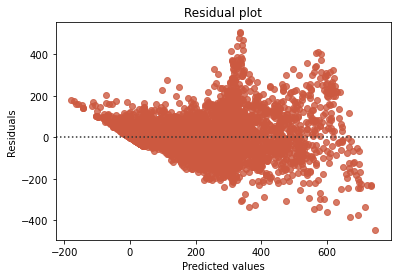

In [27]:
import seaborn as sns
sns.residplot(y_pred.flatten(), y_test.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

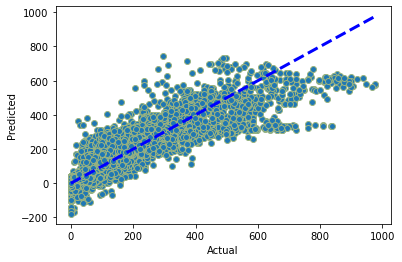

In [28]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

Text(0.5, 1.0, 'NN model predictions')

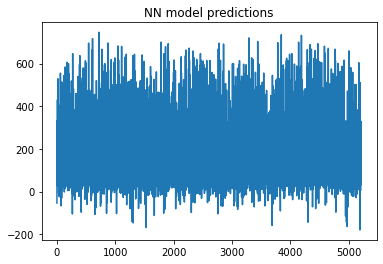

In [29]:
plt.plot(y_pred)
plt.title("NN model predictions")

# II. Data (Classification)

### II.1 Description

Data set for Classification used is related to the US census bureau. This data set is available on Kaggle and UCI and data set can be used for understanding the behaviour of the classification algorithms. Here we have different attributes on the data that help us determine that based on the available information to which income group that individual belongs to that is  either >50K or <=50K.
          
**Dataset name**: adult.csv

**Number of features**: 12

**Number of Instances**: 48842
         
**Information about features**: -

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- gender: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- income(target): >50K, <=50K


## Source


https://www.kaggle.com/wenruliu/adult-income-dataset

http://www.cs.toronto.edu/~delve/data/adult/desc.html

a) Original owners of database (name/phone/snail address/email address)
US Census Bureau.

(b) Donor of database (name/phone/snail address/email address)
Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com

(c) Date received (databases may change over time without name change!)
05/19/96

In [30]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the data**

In [31]:
df_Class = pd.read_csv("adult.csv")

**Prepocessing of the data**

In [32]:
df_Class.head() #Returns the top 5 results

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [33]:
df_Class.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
df_Class.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [35]:
cols = ['workclass','education','marital-status','occupation','relationship','race','native-country','gender']
df_Class[cols] = df_Class[cols].apply(lambda x: pd.factorize(x)[0] + 1)

df_Class.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,226802,1,7,1,1,1,1,1,0,0,40,1,<=50K
1,38,1,89814,2,9,2,2,2,2,1,0,0,50,1,<=50K
2,28,2,336951,3,12,2,3,2,2,1,0,0,40,1,>50K
3,44,1,160323,4,10,2,1,2,1,1,7688,0,40,1,>50K
4,18,3,103497,4,10,1,4,1,2,2,0,0,30,1,<=50K


In [36]:
df_Class['income']=df_Class['income'].map({ '>50K': 1, '<=50K': -1})
df_Class.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,226802,1,7,1,1,1,1,1,0,0,40,1,-1
1,38,1,89814,2,9,2,2,2,2,1,0,0,50,1,-1
2,28,2,336951,3,12,2,3,2,2,1,0,0,40,1,1
3,44,1,160323,4,10,2,1,2,1,1,7688,0,40,1,1
4,18,3,103497,4,10,1,4,1,2,2,0,0,30,1,-1


In [37]:
df_Class.workclass.value_counts()

1    33906
4     3862
2     3136
3     2799
6     1981
7     1695
5     1432
8       21
9       10
Name: workclass, dtype: int64

In [38]:
df_Class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
 14  income           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [39]:
df_Class.shape

(48842, 15)

In [40]:
df_Class.dtypes

age                int64
workclass          int64
fnlwgt             int64
education          int64
educational-num    int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
gender             int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income             int64
dtype: object

## II.2. Visualization of the data

Data visualization is a method to extract the information about the data using the graphical representation of data. Here for visualizing the Regression data set we will use matplotlib and seaborn libraries. Using the mentioned libraries, we will plot below mentioned graphs: -

**Pair plot**: Plots pairwise relationship of the data. A grid of axis is created such that each feature on the y axis is shared as a single row on the x axis across a single column. The diagonal axis shows the univariate distribution for variable in that column.

**Heatmap**: Heatmap is representation of data in form of diagram where data values are represented as colours.

**plots for understanding or analysis**

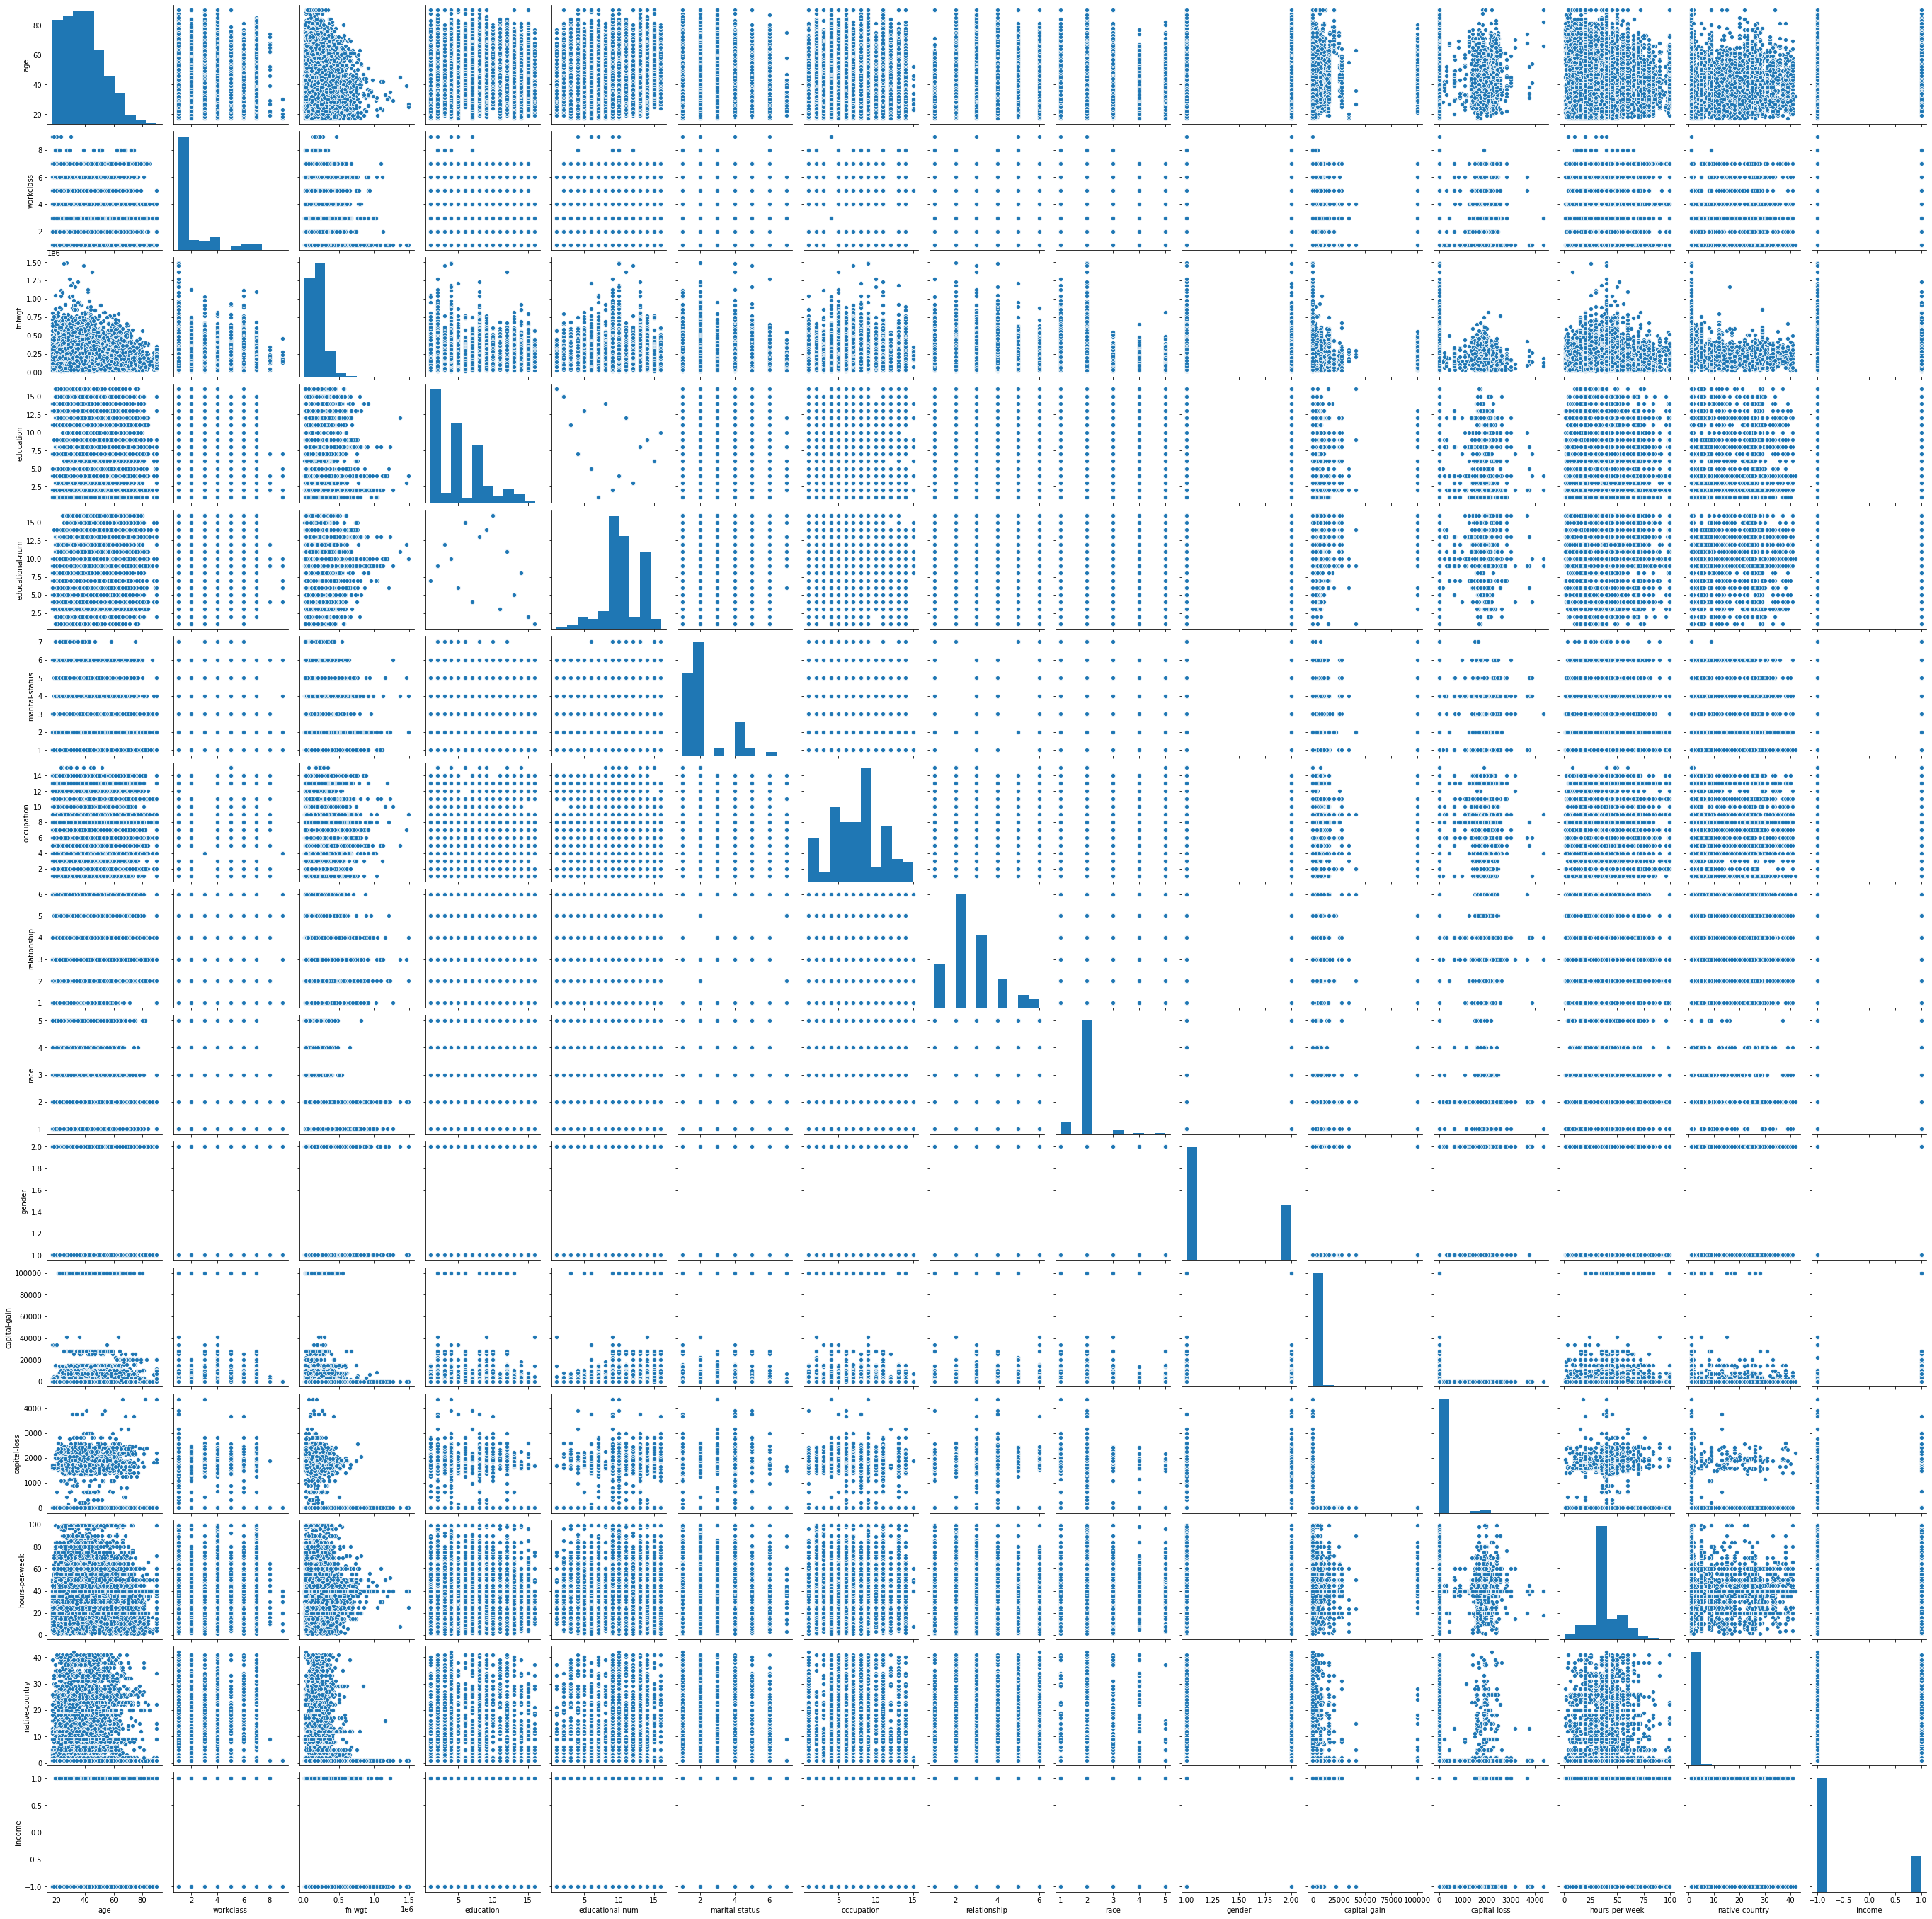

In [41]:
sns.pairplot(df_Class)

C:\Users\paree\Anaconda3\envs\py38\lib\site-packages\seaborn\matrix.py:301: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, vmin=self.vmin, vmax=self.vmax,


<AxesSubplot:>

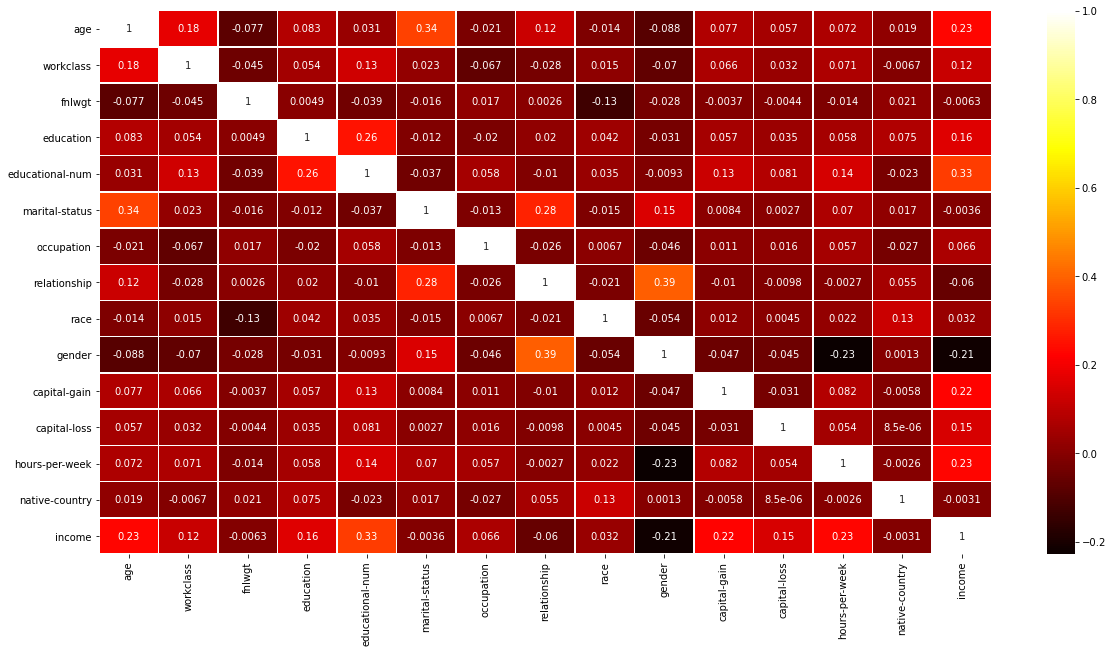

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df_Class.corr(),annot=True, lineWidth = 0.5, cmap='hot')

### II.3. Preliminary Observation

**Pairplot**: Relationship between the single variable and two variables can be derived using pairplot. From the pair plot graph we can observe that each variable is mapped to each other.

**Heatmap**: From intensity of the colors we can get the information about the correaltion of each features. 1 means the maximum corelation. Diagonal value is mapped to itself so it has the maximum corealtion that is 1. From the graph we can observe that maximun corelation is between the age and hours-per-week which is 0.23. Minum correlation between income and native-country is -0.0031.

In [44]:
df_Class_train = df_Class.loc[:,df_Class.columns!='income']
df_Class_target = df_Class.income

### III.4 Summary of Nonlinear Logistic Regression

Nonlinear Logistic regression has extra hidden layers added. Softmax function is used as the last layer with the other hidden layers. Input layer passes its output to the hidden layers and at last it is passed to the softmax function. Below is the equation for the nonlinear logistic regression: -

 $$
wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$
 
#### Summary Table (Regression vs Classification)


<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W
\end{align}
$$
</td>
<td>
$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W \\
G & = softmax(Y)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h Xl^\top \Big( (T - G) W^\top \odot (1 - Z^2) \Big)\\
W &\leftarrow W + \alpha_o Zl^\top \Big(  T - G\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $T$ is a matrix with indicator variable outputs, <br/>
and $G$ is the output matrix after the softmax layer.</td>
</tr>
</table>


### III.5 Explantation of codes

Below is the implementation of the Neural Network Logistic Regression. __init__ function is used which calls the neuralnet class and assing values. 

Train function tarins the model on training data set and takes the feature and target as input. The gradientf function unpacks the weight, calls the forward pass and calculate the error. Than backowrd propagation is proceeded with parameters as error, z, T and _lambda

The softmax function is used in the last layer.

The weights are propagated how we did earlier in the NeuralNet class. Below is the equation represents function execuated during the backward propagation:-

 $$
 W \leftarrow W + \alpha_o Zl^\top \Big(  T - g(X)\Big).
 $$


$$
 V \leftarrow V + \alpha_h Xl^\top \Big( (T - g(X)) W^\top \odot (1 - Z^2) \Big).
$$

In [45]:
from sklearn import model_selection
from sklearn.metrics import r2_score

In [46]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l


To match the input size dimensions we will add a series of Ones

In [47]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [48]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [50]:
from sklearn.metrics import roc_curve, auc

### III.5 Examination of correct implementation (NonlinearLogReg) with toy data

Text(0.5, 1.0, 'test data set')

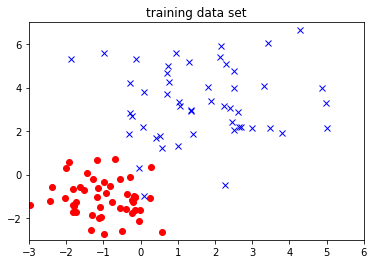

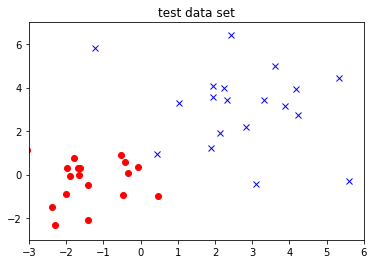

In [51]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [52]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
<ipython-input-46-7a4f49fc9093>:15: RuntimeWarning: overflow encountered in exp
  expz = np.exp(z)
<ipython-input-46-7a4f49fc9093>:16: RuntimeWarning: invalid value encountered in true_divide
  return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))


In [53]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [54]:
classes

array([[0.48531607, 0.51468393],
       [0.48693201, 0.51306799],
       [0.48634453, 0.51365547],
       [0.48281959, 0.51718041],
       [0.4870043 , 0.5129957 ],
       [0.48531194, 0.51468806],
       [0.48667344, 0.51332656],
       [0.48599228, 0.51400772],
       [0.48524399, 0.51475601],
       [0.48604823, 0.51395177],
       [0.48623153, 0.51376847],
       [0.48634376, 0.51365624],
       [0.48567479, 0.51432521],
       [0.4847101 , 0.5152899 ],
       [0.48508972, 0.51491028],
       [0.48635042, 0.51364958],
       [0.48422006, 0.51577994],
       [0.4864985 , 0.5135015 ],
       [0.48392547, 0.51607453],
       [0.48672731, 0.51327269],
       [0.48944481, 0.51055519],
       [0.48807141, 0.51192859],
       [0.48951968, 0.51048032],
       [0.48909271, 0.51090729],
       [0.49207297, 0.50792703],
       [0.49099616, 0.50900384],
       [0.48998629, 0.51001371],
       [0.48741438, 0.51258562],
       [0.48630792, 0.51369208],
       [0.49086145, 0.50913855],
       [0.

### IV.2 Plots for Results

Accuracy:  50.0 %


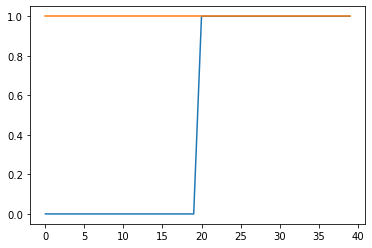

In [55]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

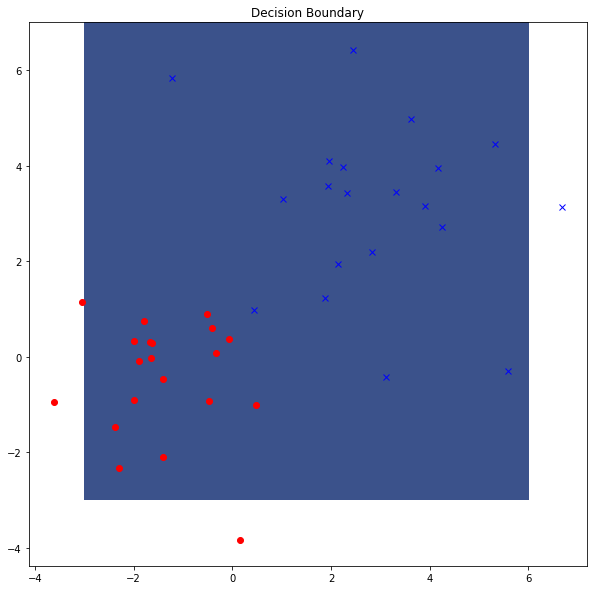

In [56]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(10,10))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

### IV.1 Examination on Classification Dataset

In [57]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(df_Class_train, df_Class_target,test_size=0.20,random_state=42)

In [58]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [59]:
nn = NeuralNetLogReg([14,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
<ipython-input-46-7a4f49fc9093>:15: RuntimeWarning: overflow encountered in exp
  expz = np.exp(z)
<ipython-input-46-7a4f49fc9093>:16: RuntimeWarning: invalid value encountered in true_divide
  return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))
<ipython-input-46-7a4f49fc9093>:36: RuntimeWarning: divide by zero encountered in log
  return -(np.sum(T*(np.log(Y)))+wpenalty)
<ipython-input-46-7a4f49fc9093>:36: RuntimeWarning: invalid value encountered in multiply
  return -(np.sum(T*(np.log(Y)))+wpenalty)


In [60]:
y_test=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test, l))
print('Accuracy:', accuracy_score(y_test, l))

F1 score: 0.6502415458937197
Accuracy: 0.8517760262053434


In [61]:
cf3=confusion_matrix(y_test, l)
cf3
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

In [62]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [63]:
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.7275675675675676
Specificity:  0.9326113116726835
Recall:  0.5877729257641922


Text(0.5, 1.0, 'Confusion Matrix')

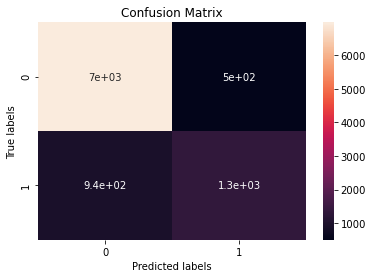

In [64]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

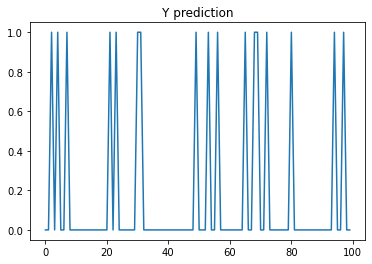

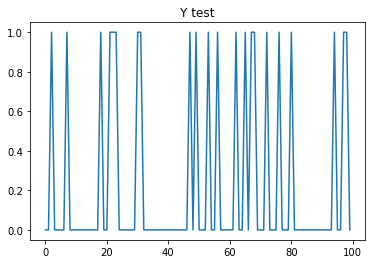

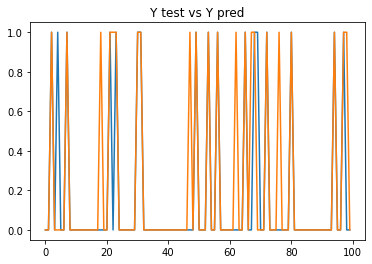

In [65]:
plt.title("Y prediction")
plt.plot(l[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(l[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

### CV for nonlinear logistic Regression

In [66]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X)
    partitionedT = split(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

### IV.1 Presentation of CV results

In [67]:
T = add_ones(np.array(df_Class_target).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [68]:
models = [[14,5,2], [14,7,2],[14,9,2], [14,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(df_Class_train), T, models))

test 0
val 0
val 1


C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
<ipython-input-46-7a4f49fc9093>:15: RuntimeWarning: overflow encountered in exp
  expz = np.exp(z)
<ipython-input-46-7a4f49fc9093>:16: RuntimeWarning: invalid value encountered in true_divide
  return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))
<ipython-input-46-7a4f49fc9093>:36: RuntimeWarning: divide by zero encountered in log
  return -(np.sum(T*(np.log(Y)))+wpenalty)
<ipython-input-46-7a4f49fc9093>:36: RuntimeWarning: invalid value encountered in multiply
  return -(np.sum(T*(np.log(Y)))+wpenalty)


[0.040647034425549566, 0.016792611251049538, 0.0025369978858350946, 0.07798537774167344]
[[14, 5, 2], [14, 7, 2], [14, 9, 2], [14, 12, 2]]
0.07798537774167344
[14, 12, 2]
val 2
[0.02145002145002145, 0.08842975206611571, 0.002599653379549393, 0.0034647033347769596]
[[14, 5, 2], [14, 7, 2], [14, 9, 2], [14, 12, 2]]
0.08842975206611571
[14, 7, 2]
val 3
[0.00429553264604811, 0.080758137618459, 0.059216013344453707, 0.06002501042100875]
[[14, 5, 2], [14, 7, 2], [14, 9, 2], [14, 12, 2]]
0.080758137618459
[14, 7, 2]
val 4
[0.023026315789473683, 0.0, 0.07750699161006791, 0.07056936647955092]
[[14, 5, 2], [14, 7, 2], [14, 9, 2], [14, 12, 2]]
0.07750699161006791
[14, 9, 2]
history_rmse [0.07798537774167344, 0.08842975206611571, 0.080758137618459, 0.07750699161006791]
params [[14, 12, 2], [14, 7, 2], [14, 7, 2], [14, 9, 2]]
[0.07798537774167344, 0.08842975206611571, 0.080758137618459, 0.07750699161006791]
[[14, 12, 2], [14, 7, 2], [14, 7, 2], [14, 9, 2]]
[14, 7, 2]
test 1
val 0
[0.005219660722053

In [69]:
print(bestAccuracy,bestParam)

[0.17367387033398823, 0.007591733445803458, 0.07496876301541025, 0.010278372591006424, 0.04949290060851927] [[14, 7, 2], [14, 12, 2], [14, 12, 2], [14, 12, 2], [14, 12, 2]]


In [70]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [ ]:
nn = NeuralNetLogReg([14,9,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\paree\Desktop\Programming Assignmnet 3_NeuralNetworks\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
<ipython-input-46-7a4f49fc9093>:15: RuntimeWarning: overflow encountered in exp
  expz = np.exp(z)
<ipython-input-46-7a4f49fc9093>:16: RuntimeWarning: invalid value encountered in true_divide
  return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))
<ipython-input-46-7a4f49fc9093>:36: RuntimeWarning: divide by zero encountered in log
  return -(np.sum(T*(np.log(Y)))+wpenalty)
<ipython-input-46-7a4f49fc9093>:36: RuntimeWarning: invalid value encountered in multiply
  return -(np.sum(T*(np.log(Y)))+wpenalty)


In [271]:
y_pred1=l
y_test1=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test1, y_pred1))
print('Accuracy:', accuracy_score(y_test1, y_pred1))

F1 score: 0.6677949709864603
Accuracy: 0.8593510082915344


### IV.2 Discussion about parameter/network structure choice

A neural network with 5 layers has been built. It has 6 nodes as input layer and 2 output layer nodes. Though we can increase the number of layers, but a greater number of layers can result into the overfitting problem. According to my data 5 fold cross validation is done by passing model variables as [[11, 3, 1], [11, 5, 1], [11, 7, 1], [11, 9, 1], [11, 12, 1]] whereas first value represents the input node, second value represents the nodes in the hidden layer and third value represents the output nodes.

Then we standardize the input and with the imported Standard Scaler and along with the target values are sent to the train function which will run 1000 iterations. Then the use function is called on the dataset in test to get the predicted output.

The parameter of the model is [14,4,2] are sent where the input is 14, hidden units are 4 and output units are 2. From the results of CV we can see that [14,4,2] has appeared more number of times. F1 score is 0.675 and accuracy is 0.86.

Upon increasing the number of nodes in hidden layer the model keeps on improving more network layers may result in the overfitting the data.

### IV.4 Discussion about the predictions results and try to analyse what nonlinear regression model learned

We used neural network for the nonlinear logistic regression analysis. Upon training the model using NeuralNetLogReg with optimum structure [14,4,2], and we have obtained the F1 score as 0.675 and accuracy as 0.86. We have used optim="scg".

Activation function was connected to each node in the neural network which made the network more powerful. According to our problem we can choose any number of hidden layers. For the last layer of the neural network softmax function is the activation function. Weights are updated by the gradient in each layer during back propagation causing the network to work efficiently.

With increasing the number of layers accuracy of the model increase but there is a limitation in increasing the number of layers. As after certain number of layers we will face the issue of overfitting if number of layers are increased beyond a number in our model. Thus, it’s very important to choose the effective number of layers based on our problem and dataset.

# V Conclusions

- From the Cross validation results we can see that model [14,9,2] has appeared a greater number of times. The model has 9 number of layers as hidden layers. Hence 9 is particularly good choice for getting optimal output where there is not overfitting or under fitting the data.
- By making use of Logistic Regression we can use Neural Network for both Regression as well as Classification problems to solve efficiently.
- Cross Validation is an efficient method to select best hyperparameter and the best value for the hidden layers.
- To determine the performance of the neural networks we use metrics F1 score and accuracy to determine the performance of the neural network.
- Neural network is efficient way to solve problems with complex dataset and with multiple dimensions.
- Thus, we can see K-fold Cross Validation can be used to evaluate the output of a Neural Network for both Classification and Regression problems.

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download **a3.tgz** from Canvas.
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
